In [10]:
from glob import glob
import json
import pandas as pd

files = glob('../output/experiments_population_coding/population_coding*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

df = pd.DataFrame(all_dicts)


df["average_training_time_per_epoch"] = df["time"] / df["epochs"]

df = (df.sort_values("test_accuracy", ascending=False))[["epochs", "test_accuracy", "beta", "average_training_time_per_epoch", "number_hidden_neurons", "number_hidden_layer"]]

df

,epochs,test_accuracy,beta,average_training_time_per_epoch,number_hidden_neurons,number_hidden_layer
6,10,0.740317,0.99,145.653861,1000,2
0,18,0.721978,0.99,223.338684,3000,1
5,7,0.717723,0.99,620.900523,3000,2
4,16,0.716843,0.80,547.116443,3000,2
2,17,0.709214,0.80,142.961439,1000,2
3,17,0.693809,0.99,119.766721,1000,1
1,17,0.562647,0.80,224.318874,3000,1
7,17,0.560739,0.80,101.554394,1000,1


In [28]:
files = [
    '../output/experiments_grid_search_early_stopping/neurons_1000_layer_1.json',
    '../output/experiments_grid_search_early_stopping/neurons_1000_layer_2.json',
    '../output/experiments_grid_search_early_stopping/neurons_3000_layer_1.json',
    '../output/experiments_grid_search_early_stopping/neurons_3000_layer_2.json',
]

comparisons = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        comparisons.append(data)

comparison_df = pd.DataFrame(comparisons).sort_values(["number_hidden_neurons", "number_hidden_layer"])

comparison_df["average_training_time_per_epoch"] = comparison_df["time"] / comparison_df["epochs"]


comparison_df

,epochs,training_accuracy,test_accuracy,time,number_hidden_neurons,number_hidden_layer,average_training_time_per_epoch
0,13,0.857143,66.916961,744.200316,1000,1,57.246178
1,9,0.964286,70.494700,887.317391,1000,2,98.590821
2,6,0.750000,66.033569,576.881848,3000,1,96.146975
3,14,0.928571,72.526502,6912.981362,3000,2,493.784383


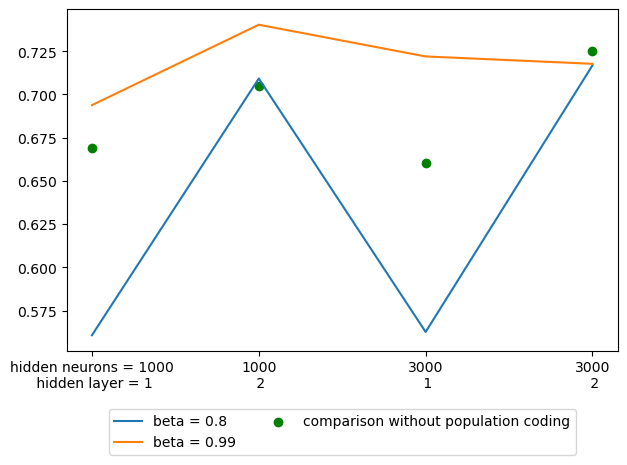

In [27]:
import matplotlib.pyplot as plt

grouped_by_beta = df.groupby("beta")
x = [0, 1, 2, 3]

for index, group_df in grouped_by_beta:
    group_df = group_df.sort_values(["number_hidden_neurons", "number_hidden_layer"])
    test_accs = group_df["test_accuracy"]

    plt.plot(x, test_accs, label=f"beta = {index}")
    plt.xticks(
        x,
        ["hidden neurons = 1000\n hidden layer = 1", "1000\n 2", "3000\n 1", "3000\n 2"]
    )

plt.scatter(x, comparison_df["test_accuracy"] / 100, label='comparison without population coding', color='green')

# Move legend below plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


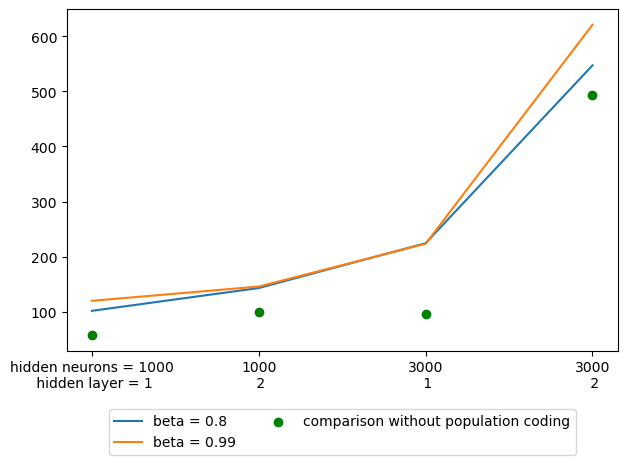

In [30]:
import matplotlib.pyplot as plt

grouped_by_beta = df.groupby("beta")
x = [0, 1, 2, 3]

for index, group_df in grouped_by_beta:
    group_df = group_df.sort_values(["number_hidden_neurons", "number_hidden_layer"])
    test_accs = group_df["average_training_time_per_epoch"]

    plt.plot(x, test_accs, label=f"beta = {index}")
    plt.xticks(
        x,
        ["hidden neurons = 1000\n hidden layer = 1", "1000\n 2", "3000\n 1", "3000\n 2"]
    )

plt.scatter(x, comparison_df["average_training_time_per_epoch"], label='comparison without population coding', color='green')

# Move legend below plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


In [7]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS, THRESHOLD
import copy
import torch

num_epochs = 'early_stopping'
sparsity = 0
threshold = 1
BETAS = [0.99, 0.8]
NUMBER_HIDDEN_LAYERS = [1,2]
NUMBER_HIDDEN_NEURONS = [1000, 3000]

one_hidden_layer_models = []
two_hidden_layer_models = []

one_hidden_layer_titles = []
two_hidden_layer_titles = []


for beta in BETAS:
    for number_hidden_layer in NUMBER_HIDDEN_LAYERS:
        for number_hidden_neurons in NUMBER_HIDDEN_NEURONS:
            base_net = ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS, 
                                                    number_hidden_neurons=number_hidden_neurons, 
                                                    number_hidden_layers=number_hidden_layer,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS * 50, 
                                                    beta=beta, 
                                                    threshold=THRESHOLD,
                                                    time_steps=TIME_STEPS)
            

            model = copy.deepcopy(base_net)
            model_path=f'./models/experiments_population_coding/population_coding_beta_{beta}_hidden_layer_{number_hidden_layer}_hidden_neurons_{number_hidden_neurons}.pth'

            model.load_state_dict(torch.load(model_path))

            if number_hidden_layer == 1:
                one_hidden_layer_models.append(model)
                one_hidden_layer_titles.append(f'Beta = {beta}, {number_hidden_layer}|{number_hidden_neurons}')
            else:
                two_hidden_layer_models.append(model)
                two_hidden_layer_titles.append(f'Beta = {beta}, {number_hidden_layer}|{number_hidden_neurons}')


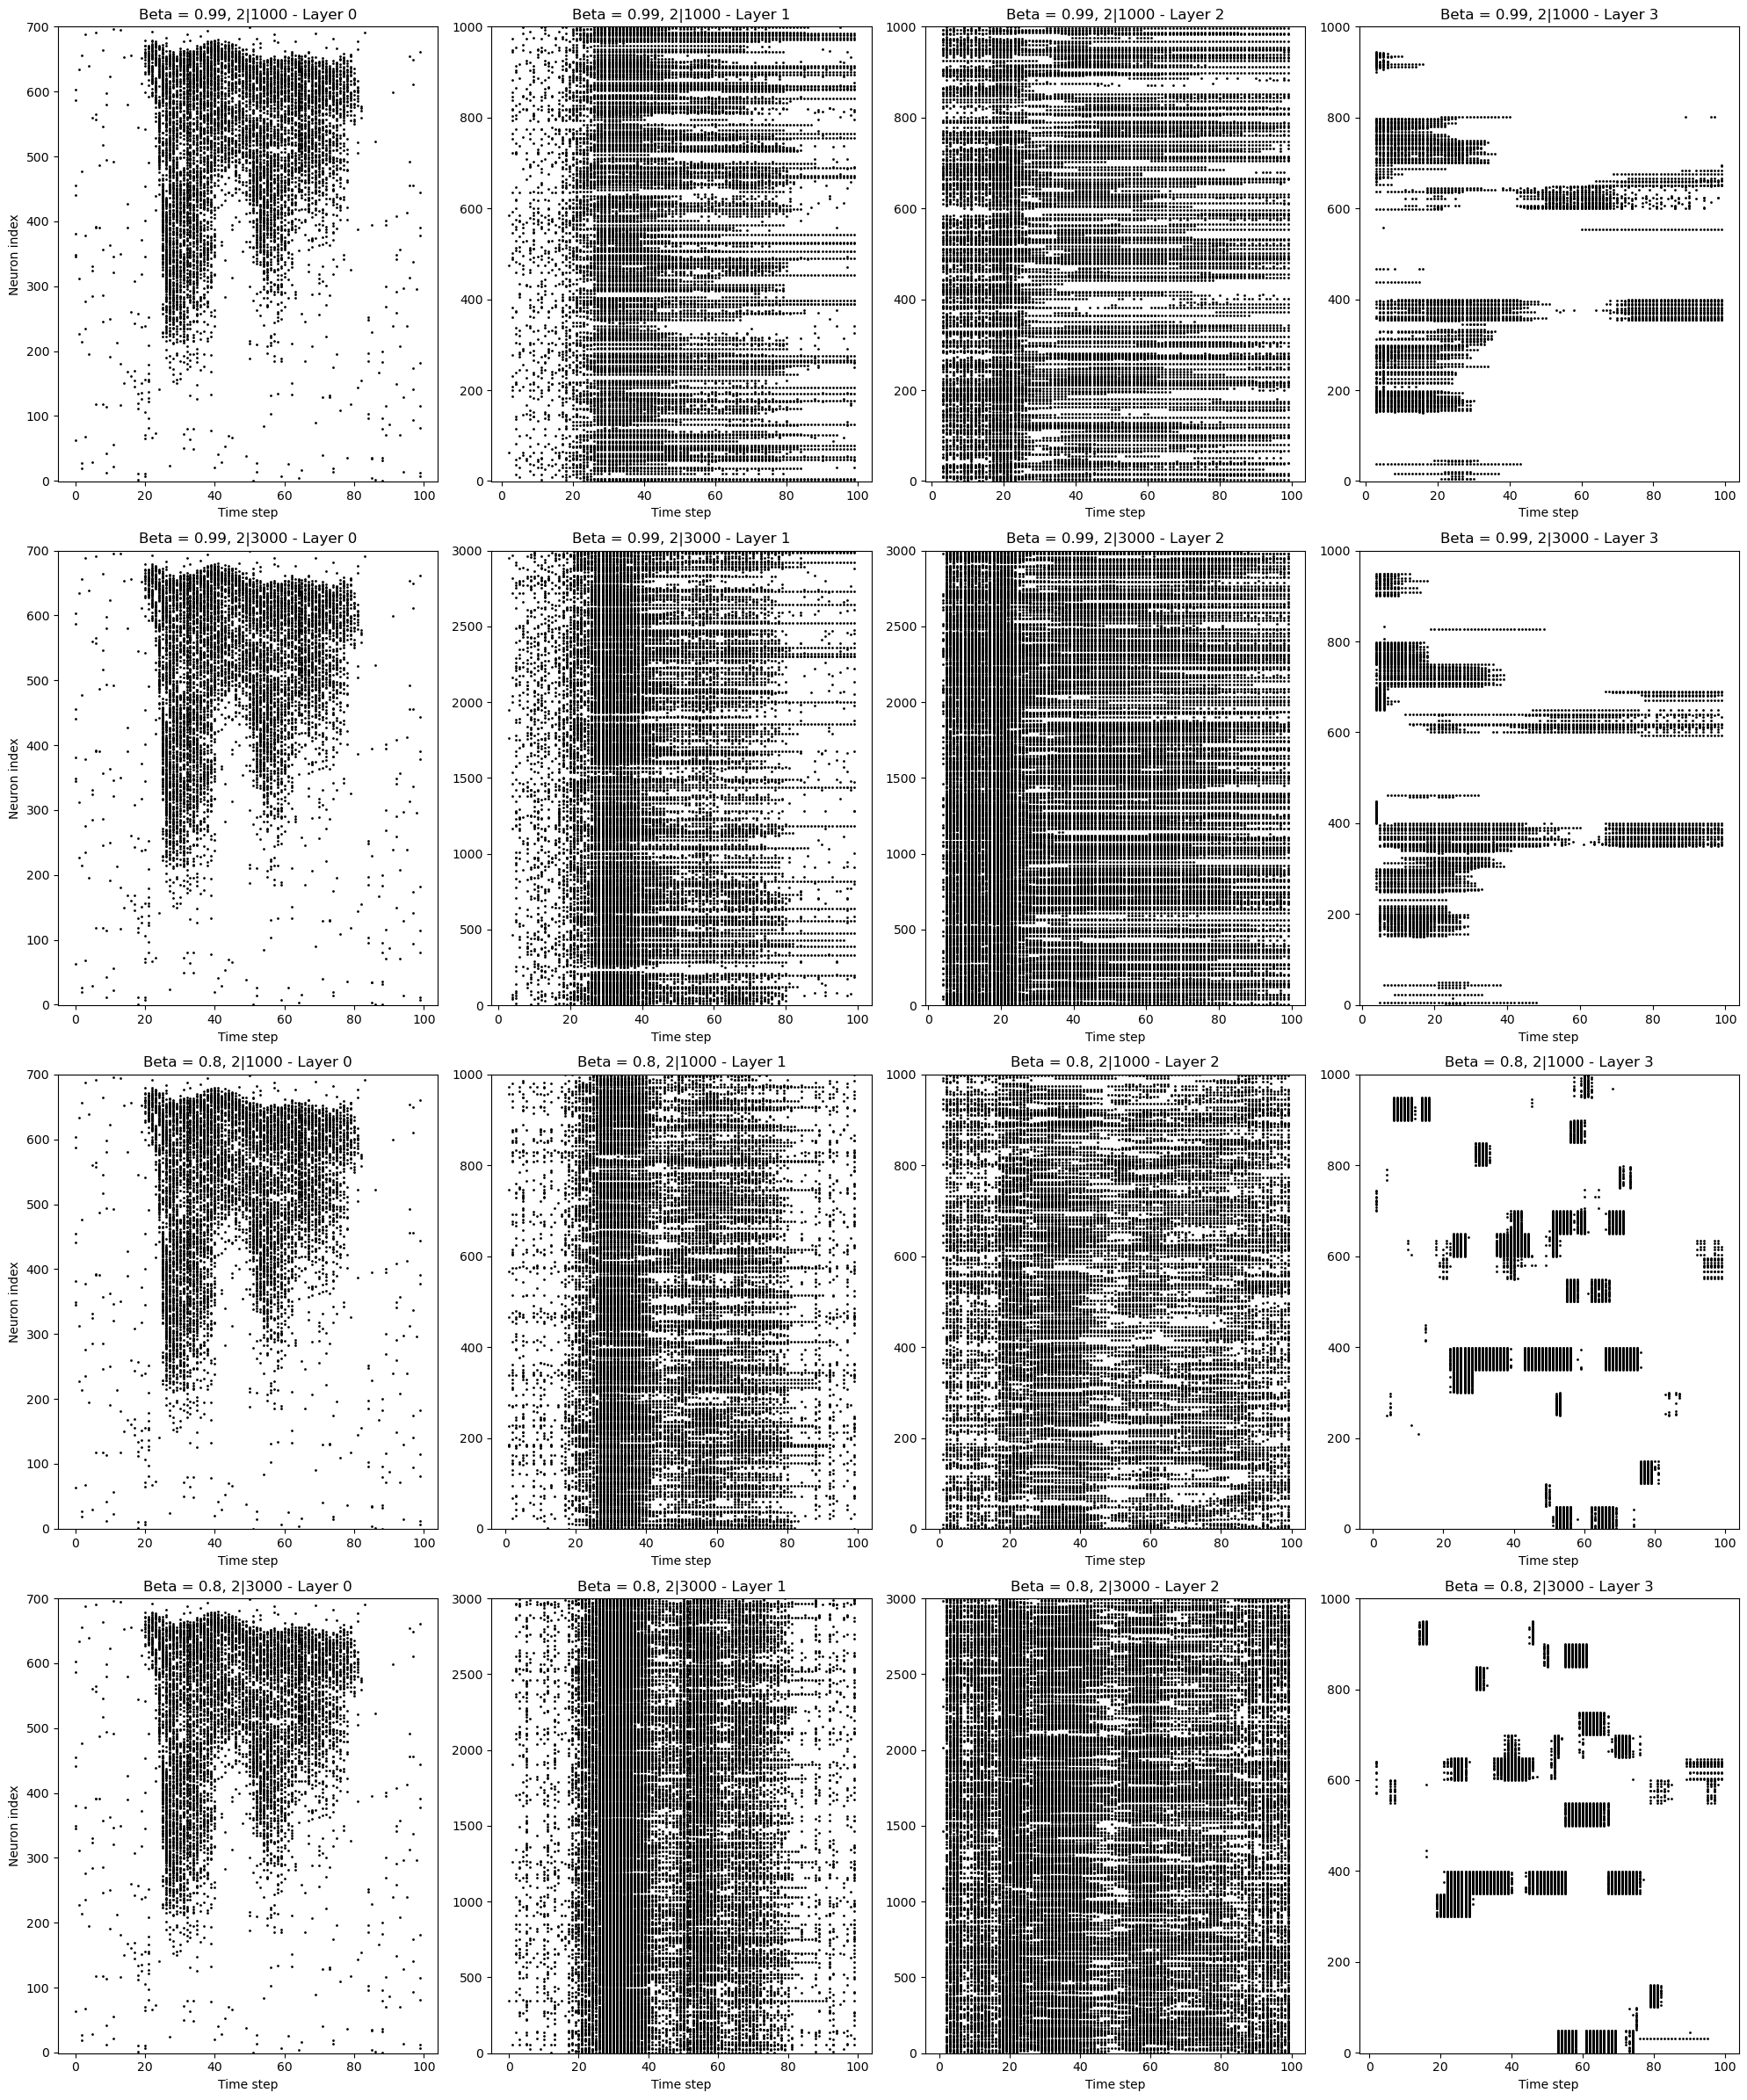

In [9]:
from util.plot_layer_development import plot_layer_development

plot_layer_development(two_hidden_layer_models, sub_titles=two_hidden_layer_titles)

In [ ]:
import copy
import torch

NUMBER_HIDDEN_NEURONS = 3000
NUMBER_HIDDEN_LAYER = 2

beta = 0.99
threshold = 1
sparsities = [0, 0.2, 0.7, 0.95]

base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                 number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                 number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                 beta=beta,
                                                 threshold=threshold,
                                                 time_steps=TIME_STEPS,
                                                 number_hidden_layers=NUMBER_HIDDEN_LAYER)

models = []

for sparsity in sparsities:    
    model = copy.deepcopy(base_net)
    model_path = build_model_path(sparsity, beta, threshold)
    print(model_path)
    model.load_state_dict(torch.load(model_path))

    models.append(model)

In [2]:
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from constants import (
    BETA,
    NUMBER_HIDDEN_NEURONS,
    NUMBER_INPUT_NEURONS,
    NUMBER_OUTPUT_NEURONS,
    THRESHOLD,
    TIME_STEPS,
)

model = ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS, 
                                         number_hidden_neurons=3000, 
                                         number_output_neurons=NUMBER_OUTPUT_NEURONS, 
                                         beta=BETA, 
                                         threshold=THRESHOLD,
                                         time_steps=TIME_STEPS, 
                                         number_hidden_layers=2,
                                         sparsity=0)

TypeError: __init__() got an unexpected keyword argument 'sparsity'

In [ ]:
import torch
import copy

membrane_potential_cross_entropy = copy.deepcopy(model)
membrane_potential_cross_entropy.load_state_dict(torch.load('./models/experiments_population_coding/best_grid_search_membrane_potential_cross_entropy.pth'))

rate_code_cross_entropy = copy.deepcopy(model)
rate_code_cross_entropy.load_state_dict(torch.load('./models/experiments_population_coding/best_grid_search_rate_code_cross_entropy.pth'))

<All keys matched successfully>

In [ ]:
import torch
from util.get_device import get_device
from torch.utils.data import DataLoader
from tonic import datasets, transforms

selection_index = 2
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=TIME_STEPS
)

test_data = datasets.SHD("./data", transform=frame_transform, train=False)

test_data_loader = DataLoader(test_data, shuffle=False, batch_size=32)

data, target = list(test_data_loader)[0]
data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)

x_selected = data[:, selection_index, :]
y_selected = target[selection_index]


/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


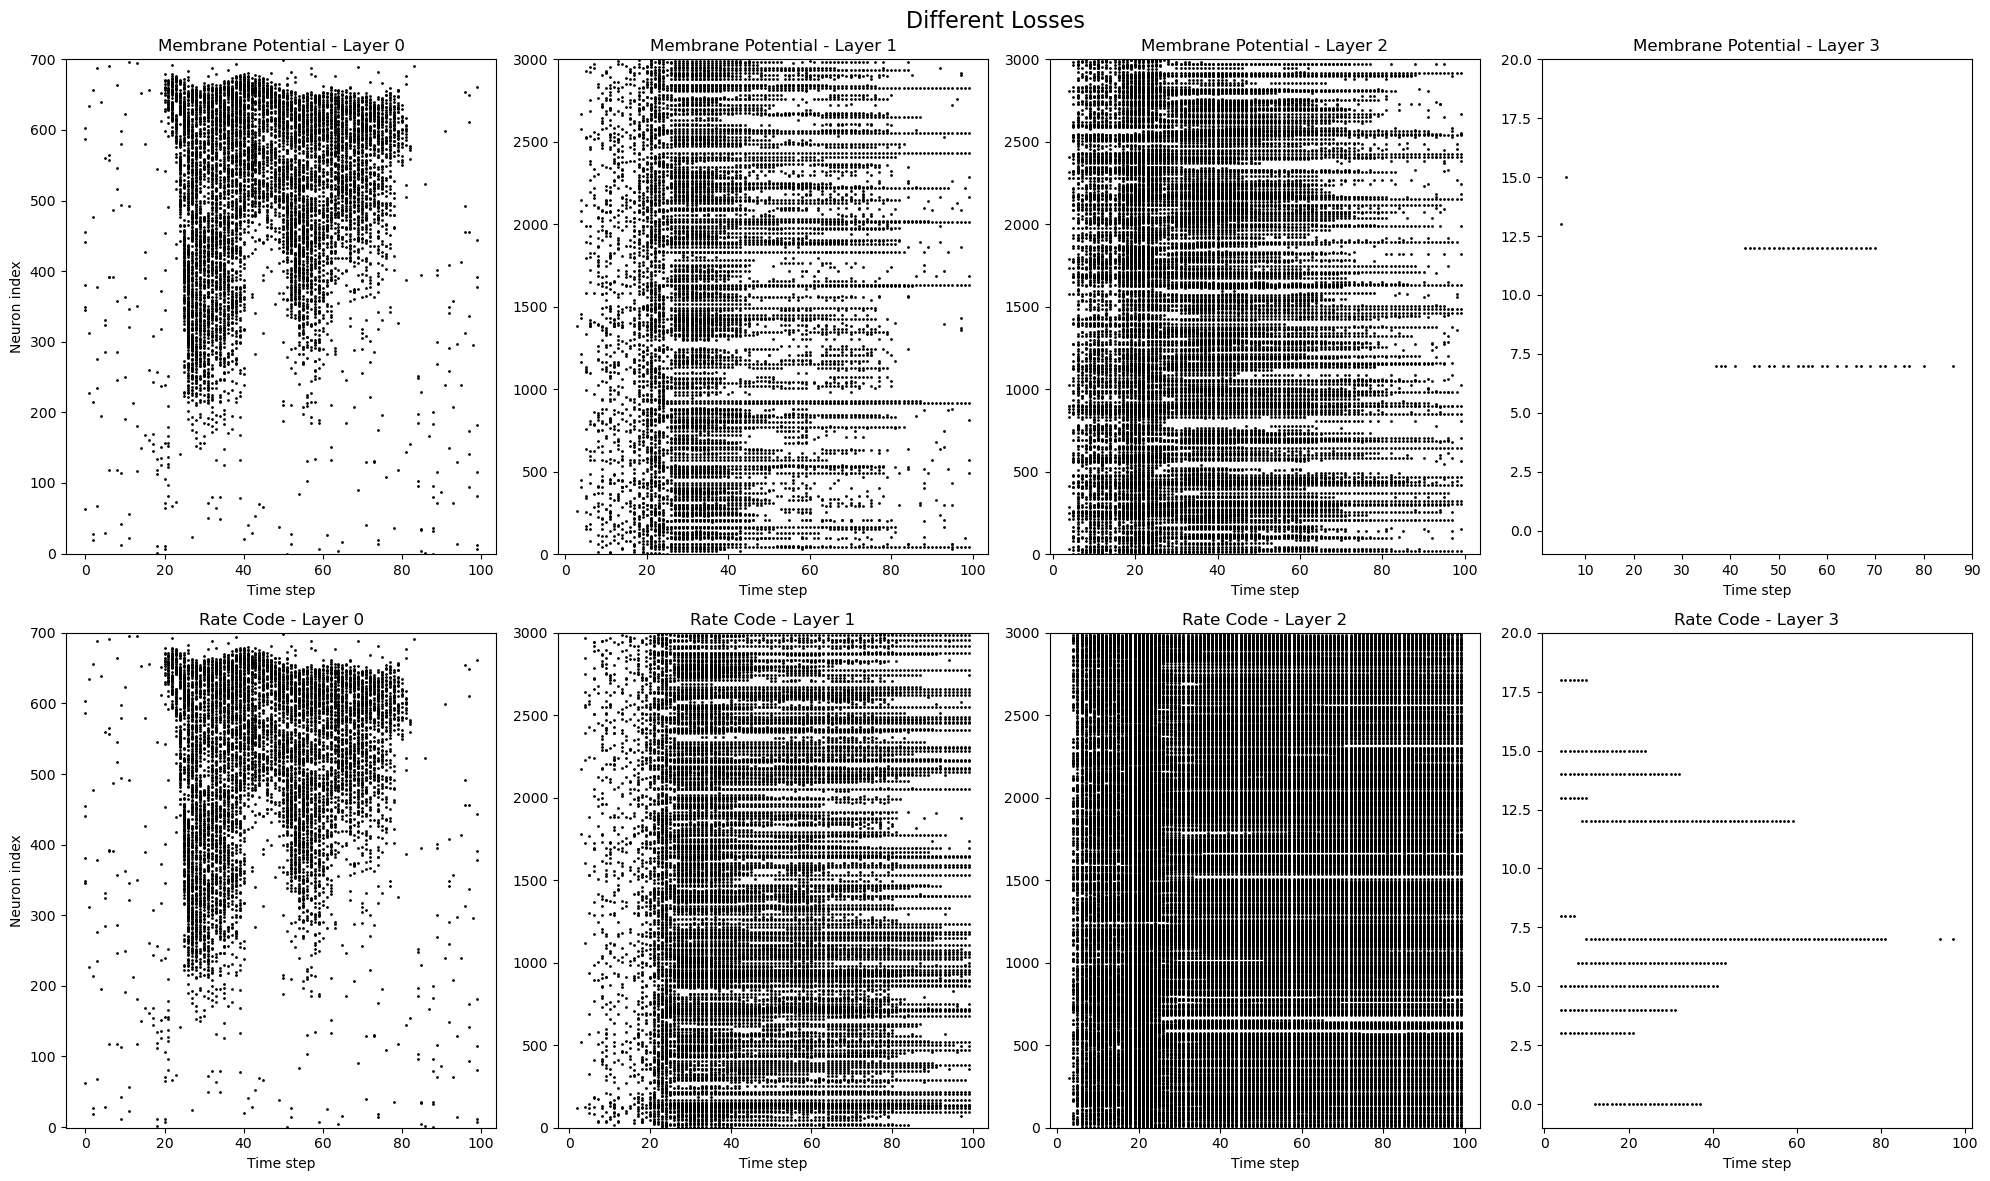

In [ ]:
from util.plot_layer_development import plot_layer_development

models = [
    membrane_potential_cross_entropy,
    rate_code_cross_entropy
]

plot_layer_development(models, data, selection_index, ["Membrane Potential", "Rate Code"], "Different Losses")

# Population coding with smaller number of timesteps

In [ ]:
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
from training.train_snn import train_snn

TIME_STEPS = 100

NUMBER_HIDDEN_NEURONS = 1000
NUMBER_HIDDEN_LAYER = 1
beta = 0.99
threshold = 1

population_coding_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS * 50,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

regular_loss_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

sparsity = 0

train_snn(population_coding_net, 
            num_epochs=20, 
            time_steps=TIME_STEPS,
            sparsity=sparsity, 
            loss_configuration='population_coding',
            output_file_path=f'./output/experiments_population_coding/1_timestep_population_coding.json')

/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0
loss 11821.667059718306
train accuracy 0.08925944090240313
test accuracy 0.2027582159624413
Epoch: 1


KeyboardInterrupt: 